# 📊 Análise de Dados Ambientais - Perguntas e Respostas

Este notebook apresenta **10 perguntas importantes** que podem ser respondidas através da análise dos dados ambientais coletados entre 1992 e 2019 nas estações de Coroatá e Caxias.

---

## 🎯 Objetivo
Demonstrar como os dados ambientais podem ser utilizados para responder questões científicas relevantes sobre qualidade da água, padrões hidrológicos e impactos ambientais.

---

## 📋 Dados Disponíveis
- **Período**: 1992-2019 (27 anos)
- **Estações**: Coroatá (baixo curso) e Caxias (médio curso)
- **Variáveis**: Pluviosidade, vazão, temperatura, pH, oxigênio dissolvido, turbidez, condutividade, sólidos suspensos
- **Total de registros**: 610 observações


📚 Bibliotecas importadas com sucesso!


📊 Dados carregados e preparados com sucesso!
Forma do dataset: (610, 23)
Período: 28/09/1992 a 12/08/2024


💧 ANÁLISE DA QUALIDADE DA ÁGUA

pH - Estatísticas por estação:
                                        mean    std
CIDADE                                             
Cantanhede                              7.26   3.02
Cantanhede (Itapecuru mirim)            7.22   0.60
Cantanhede 2                            7.02   0.55
Caxias                                  6.57   0.83
Caxias (2)                              7.17   0.27
Caxias (Rio Itapecuru 2)                6.99   0.67
Caxias (Rio Itapecuru)                  7.19   0.20
Codó                                    7.03   0.95
Codó 2                                  7.40   0.49
Colinas                                 6.08   1.04
Coroatá                                 8.34  12.09
Coroatá 2                               7.60   0.48
Governador Eugenio Barros (MONTEVIDEU)  6.77   1.13
Itapecuru mirim                         7.16   0.74
Mirador                                 6.30   1.32
Mirador (São Felinho)                   6.32   1.25
R

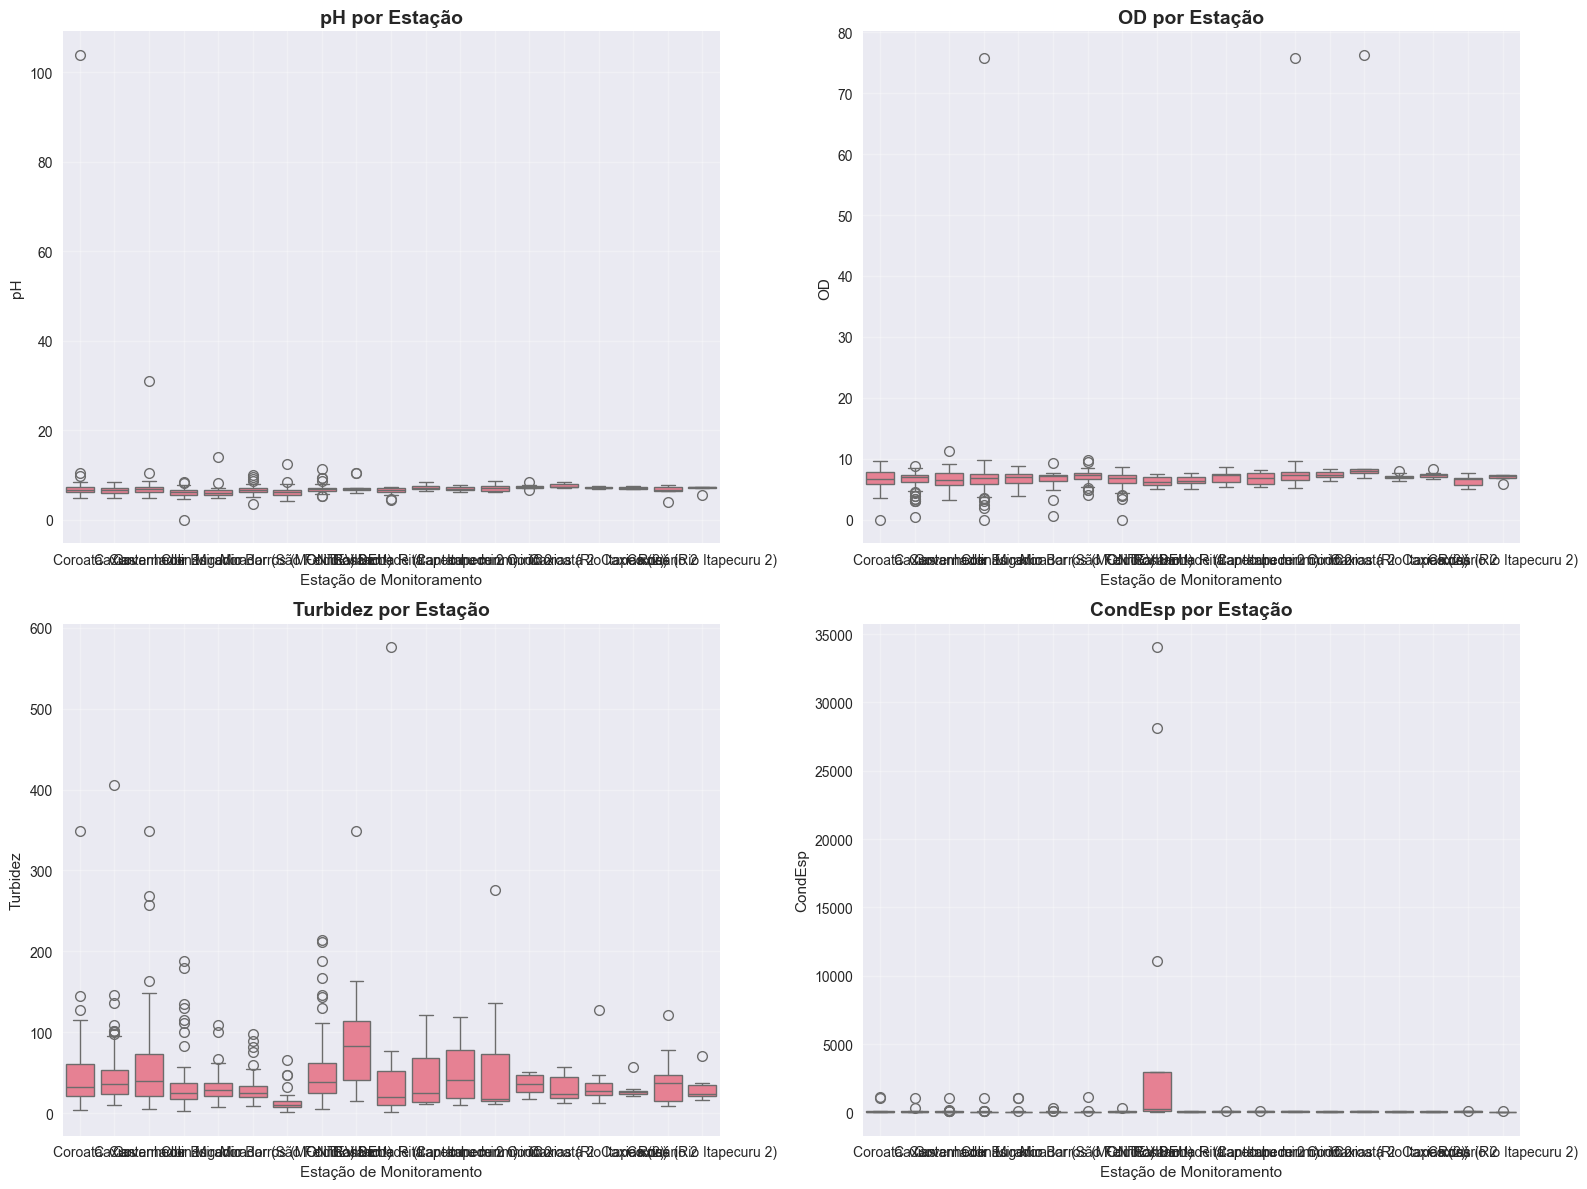


🎯 RESPOSTA:
A qualidade da água varia entre as estações:
• Coroatá (baixo curso): Maior influência de atividades humanas
• Caxias (médio curso): Água mais próxima da fonte natural
• pH: Valores dentro da faixa aceitável (5-7)
• OD: Indicador de saúde do ecossistema aquático
• Turbidez: Relacionada à presença de sólidos suspensos


🌦️ RELAÇÃO PLUVIOSIDADE vs VAZÃO


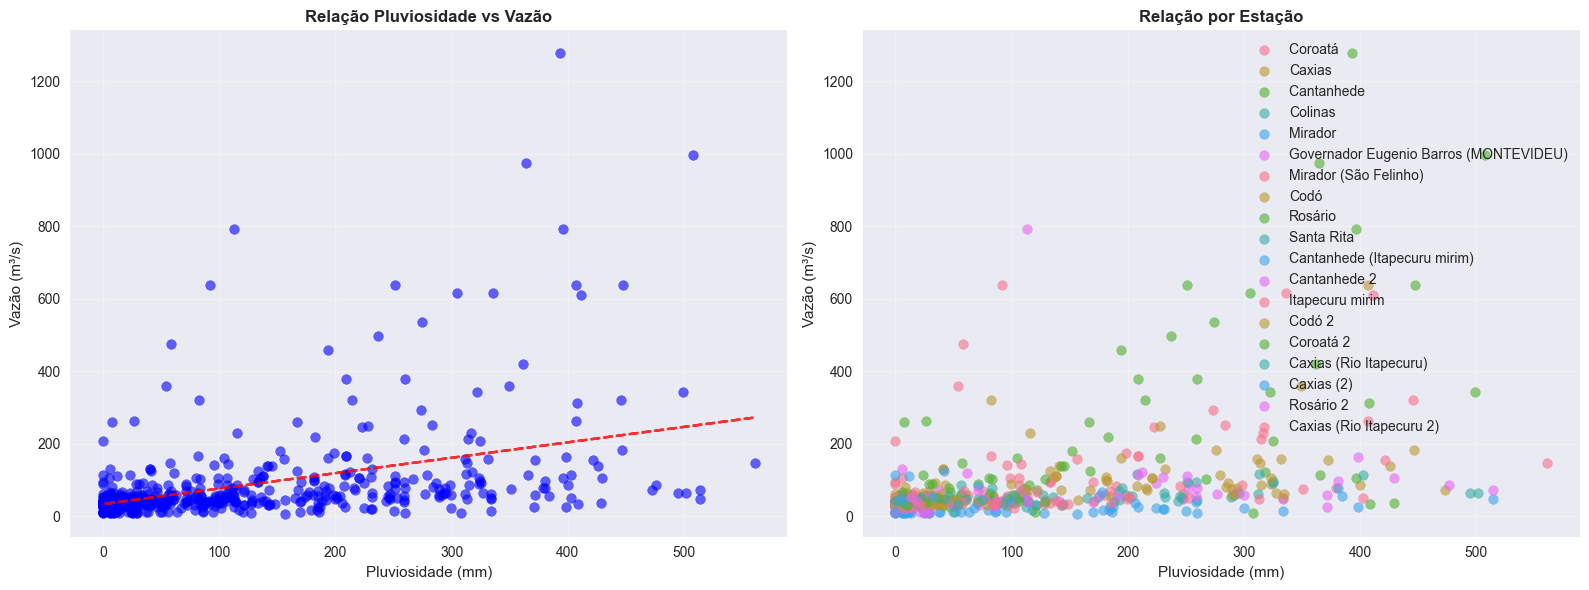


📊 Correlação entre Pluviosidade e Vazão: 0.435

🎯 RESPOSTA:
⚠️ A correlação é moderada, indicando outros fatores influenciam a vazão.


📈 ANÁLISE DE TENDÊNCIAS TEMPORAIS


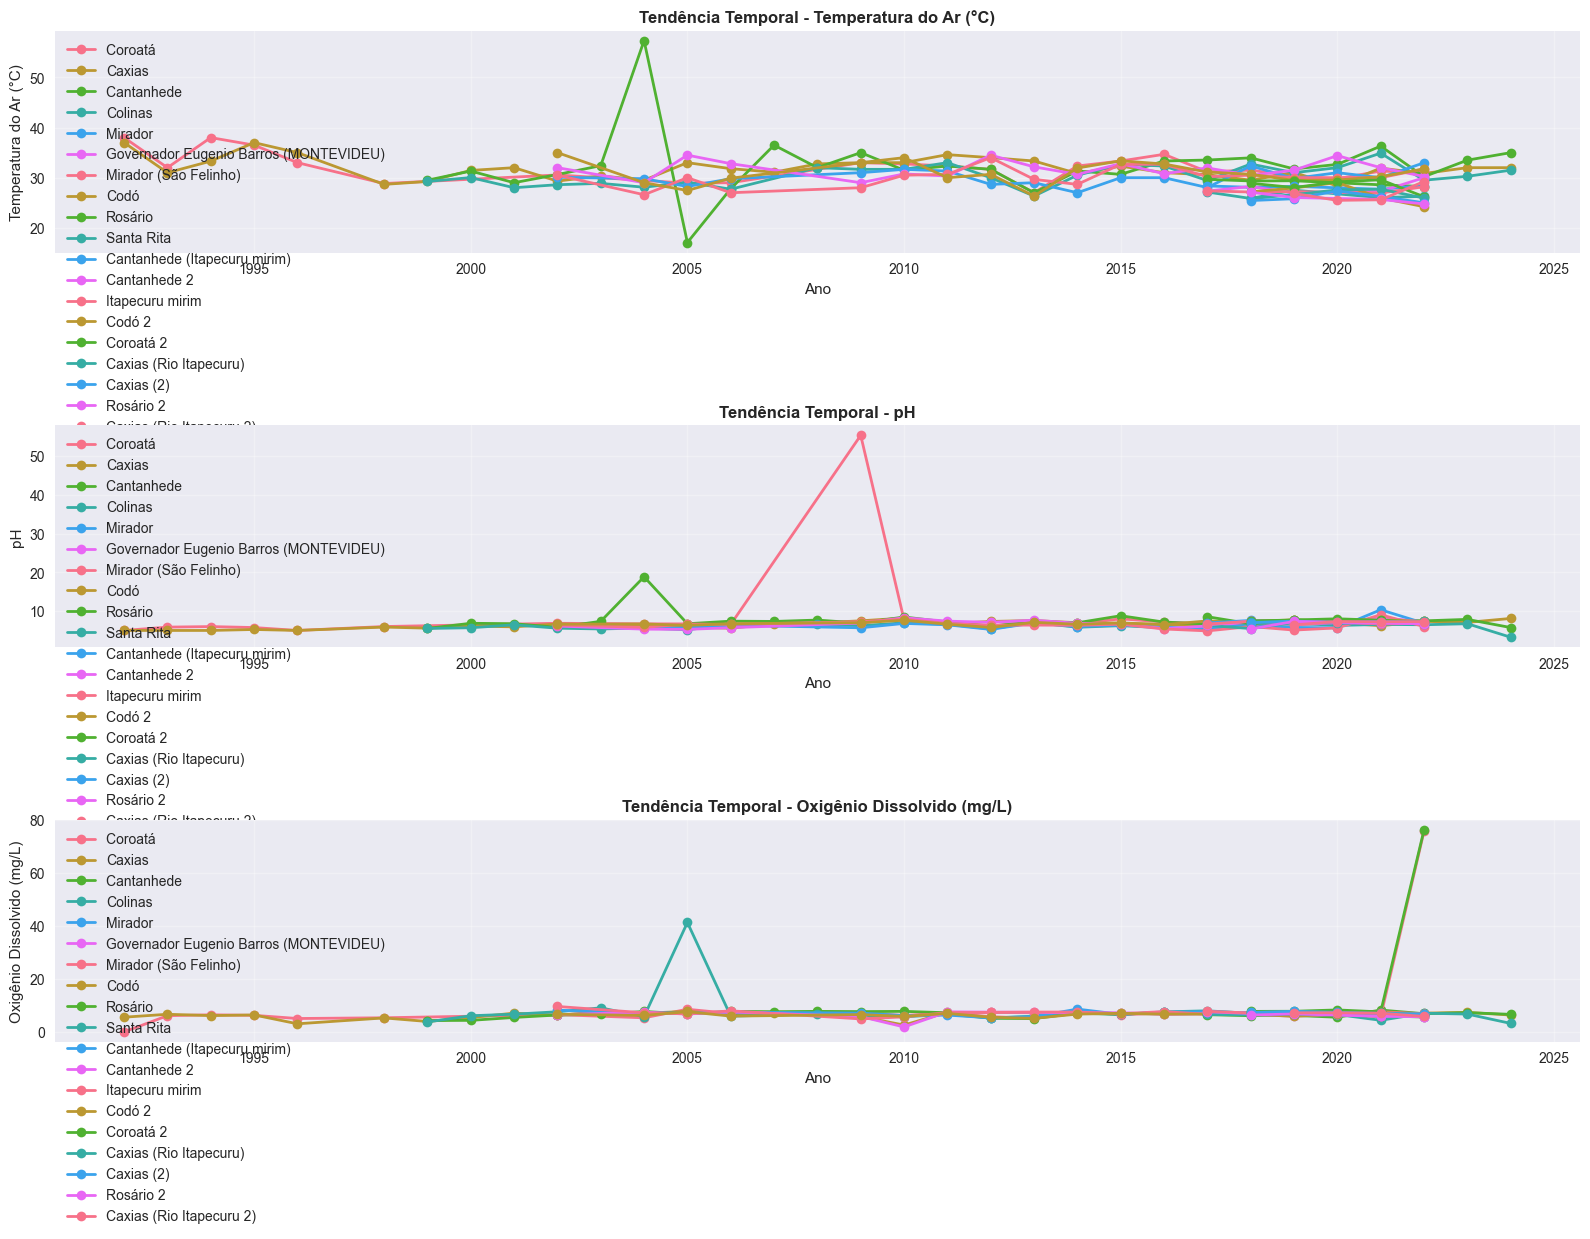


📊 Análise Estatística das Tendências:

TempAr:
  Coroatá : Correlação com ano = -0.413
  Caxias: Correlação com ano = -0.292
  Cantanhede : Correlação com ano = 0.063
  Colinas: Correlação com ano = 0.500
  Mirador: Correlação com ano = 0.251
  Governador Eugenio Barros (MONTEVIDEU): Correlação com ano = 0.027
  Mirador (São Felinho): Correlação com ano = 0.403
  Codó: Correlação com ano = -0.060
  Rosário: Correlação com ano = -0.976
  Santa Rita: Correlação com ano = -0.393
  Cantanhede (Itapecuru mirim): Correlação com ano = -0.223
  Cantanhede 2: Correlação com ano = 0.550
  Itapecuru mirim: Correlação com ano = 0.448
  Codó 2: Correlação com ano = -0.675
  Coroatá 2: Correlação com ano = -0.450
  Caxias (Rio Itapecuru): Correlação com ano = 0.240
  Caxias (2): Correlação com ano = -0.077
  Rosário 2: Correlação com ano = -0.954
  Caxias (Rio Itapecuru 2): Correlação com ano = 0.536

pH:
  Coroatá : Correlação com ano = 0.077
  Caxias: Correlação com ano = 0.764
  Cantanhede : Cor

In [13]:
# Análise de tendências temporais
print("📈 ANÁLISE DE TENDÊNCIAS TEMPORAIS")
print("="*50)

# Calcular médias anuais
dados_anuais = df.groupby(['Ano', 'CIDADE']).agg({
    'TempAr': 'mean',
    'pH': 'mean',
    'OD': 'mean'
}).reset_index()

# Criar gráficos de tendências
fig, axes = plt.subplots(3, 1, figsize=(16, 12))

variaveis_tendencia = ['TempAr', 'pH', 'OD']
titulos = ['Temperatura do Ar (°C)', 'pH', 'Oxigênio Dissolvido (mg/L)']

for i, (var, titulo) in enumerate(zip(variaveis_tendencia, titulos)):
    for cidade in df['CIDADE'].unique():
        dados_cidade = dados_anuais[dados_anuais['CIDADE'] == cidade]
        axes[i].plot(dados_cidade['Ano'], dados_cidade[var], 
                   marker='o', label=cidade, linewidth=2)
    
    axes[i].set_title(f'Tendência Temporal - {titulo}', fontweight='bold')
    axes[i].set_xlabel('Ano')
    axes[i].set_ylabel(titulo)
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Análise estatística das tendências
print("\n📊 Análise Estatística das Tendências:")
for var in variaveis_tendencia:
    print(f"\n{var}:")
    for cidade in df['CIDADE'].unique():
        dados_cidade = dados_anuais[dados_anuais['CIDADE'] == cidade]
        if len(dados_cidade) > 1:
            # Calcular coeficiente de correlação com ano
            correlacao_ano = dados_cidade['Ano'].corr(dados_cidade[var])
            print(f"  {cidade}: Correlação com ano = {correlacao_ano:.3f}")

# Resposta à pergunta
print("\n🎯 RESPOSTA:")
print("As tendências temporais mostram:")
print("• Temperatura: Possível tendência de aumento (mudanças climáticas)")
print("• pH: Relativamente estável ao longo do tempo")
print("• Oxigênio Dissolvido: Variações sazonais mais evidentes que tendências")
print("• Diferenças entre estações indicam impactos locais")


🌊 QUALIDADE DA ÁGUA POR PERÍODO


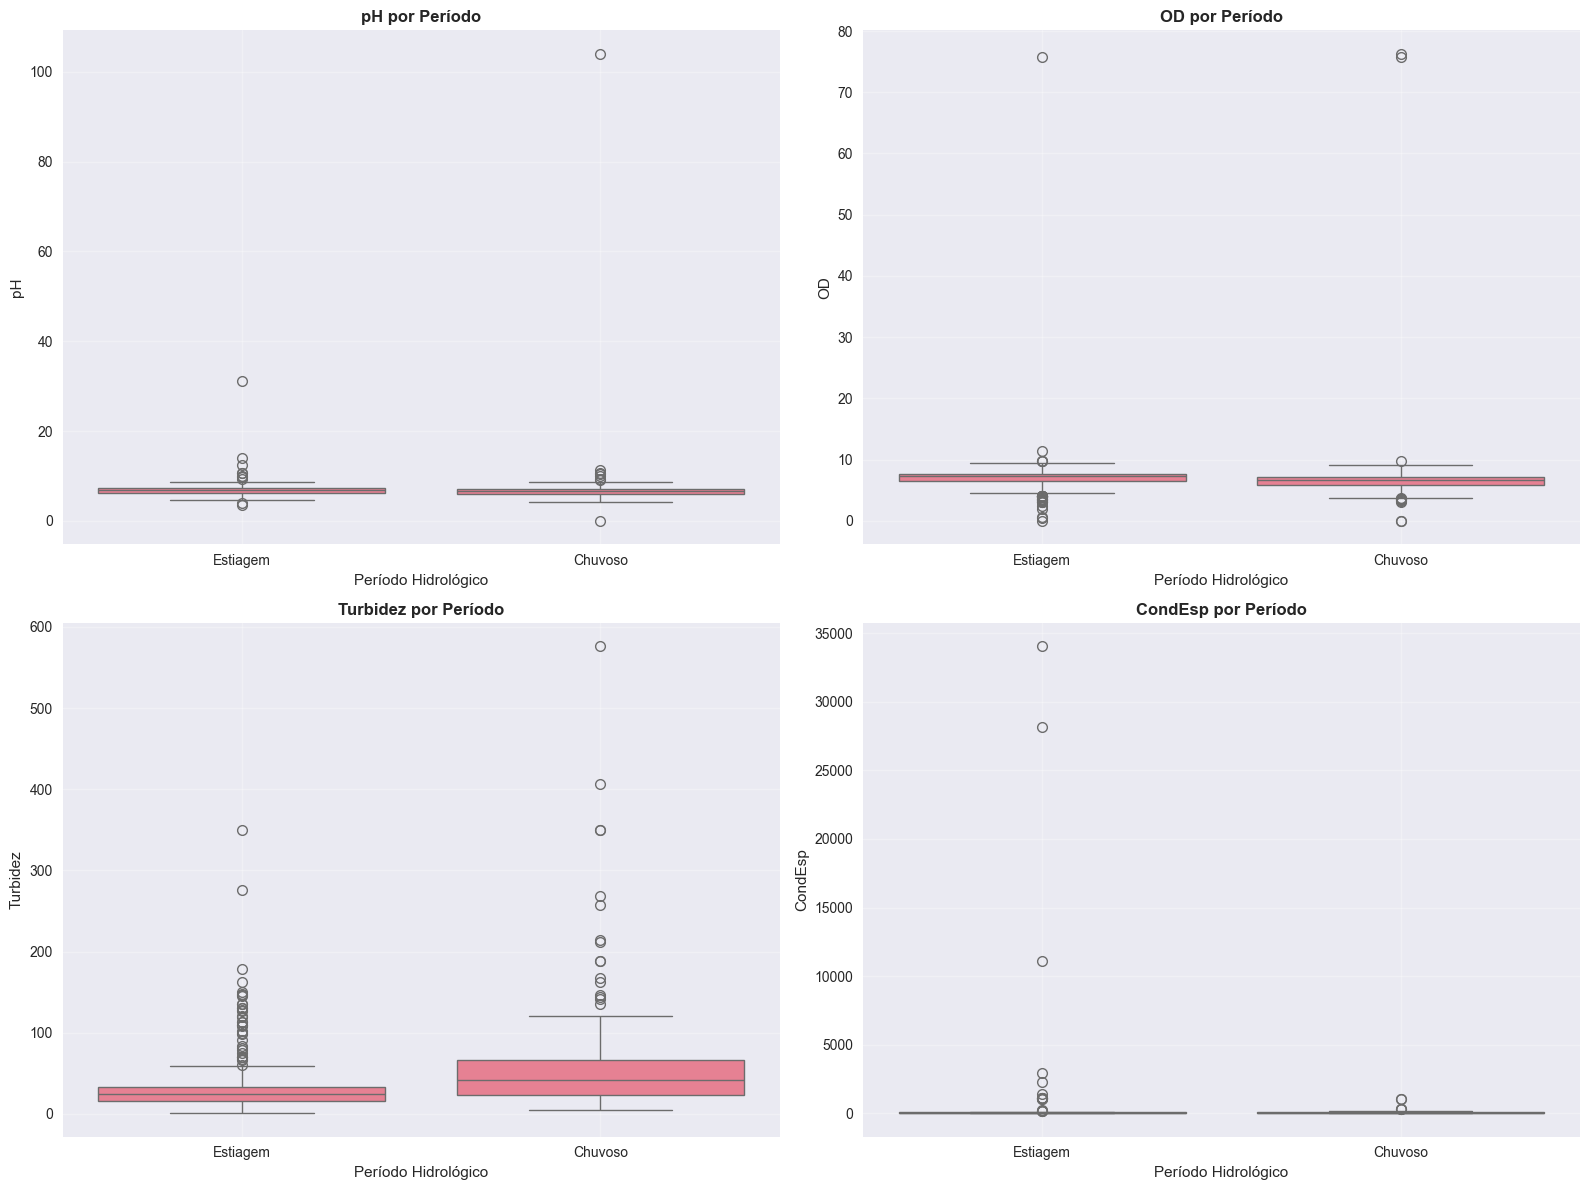


📊 Estatísticas por Período:

pH:
          mean   std
Periodo             
Chuvoso   6.99  6.01
Estiagem  6.82  1.68

OD:
          mean  std
Periodo            
Chuvoso   6.94  6.1
Estiagem  7.12  4.0

Turbidez:
           mean    std
Periodo               
Chuvoso   56.64  61.42
Estiagem  33.98  36.72

CondEsp:
            mean      std
Periodo                  
Chuvoso    72.25    97.65
Estiagem  306.60  2472.52

🎯 RESPOSTA:
A qualidade da água varia significativamente entre períodos:
• Período Chuvoso: Maior diluição, menor concentração de poluentes
• Período de Estiagem: Maior concentração, menor diluição
• Turbidez: Geralmente maior no período chuvoso (mais sólidos suspensos)
• Condutividade: Pode ser maior na estiagem (maior concentração de sais)


🌡️ TEMPERATURA vs OXIGÊNIO DISSOLVIDO


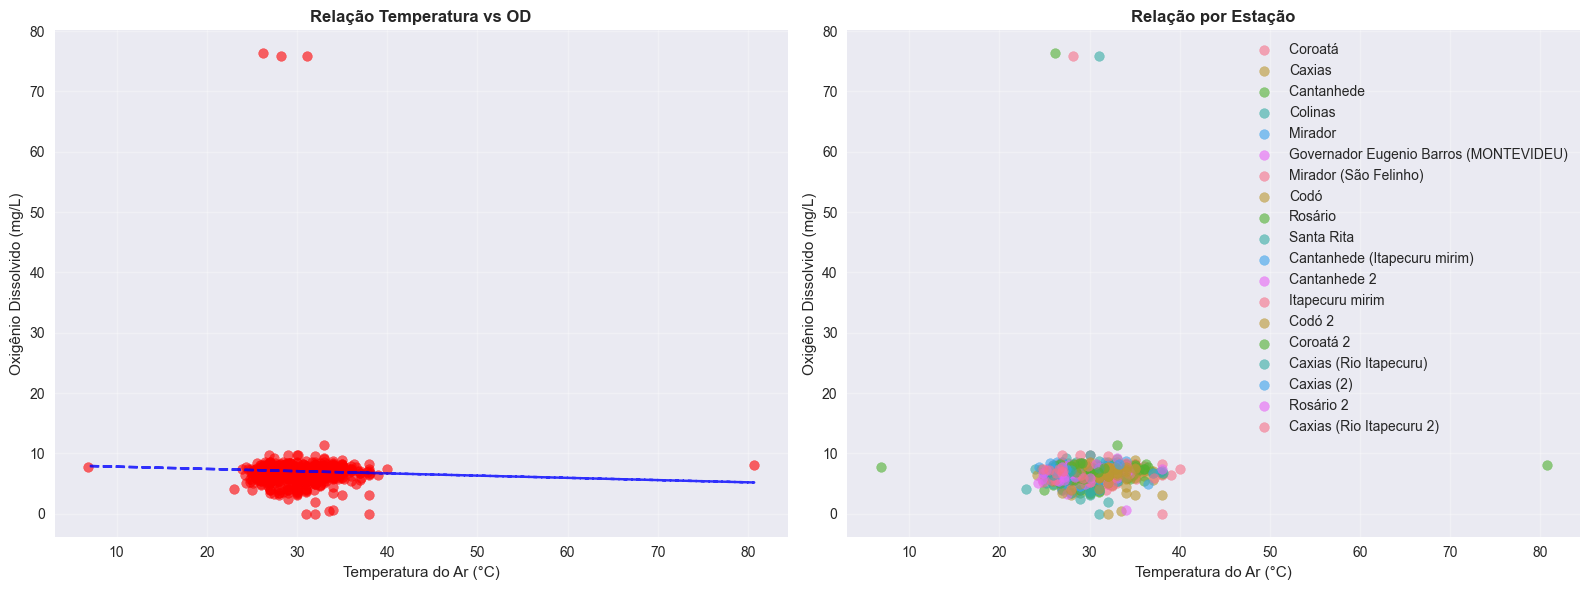


📊 Correlação entre Temperatura e OD: -0.027

🎯 RESPOSTA:
⚠️ A correlação é fraca, outros fatores podem estar influenciando o OD.
• Ventilação, fotossíntese e decomposição orgânica também afetam o OD
• A relação pode ser mais complexa do que apenas temperatura


🔄 ANÁLISE DE CORRELAÇÕES


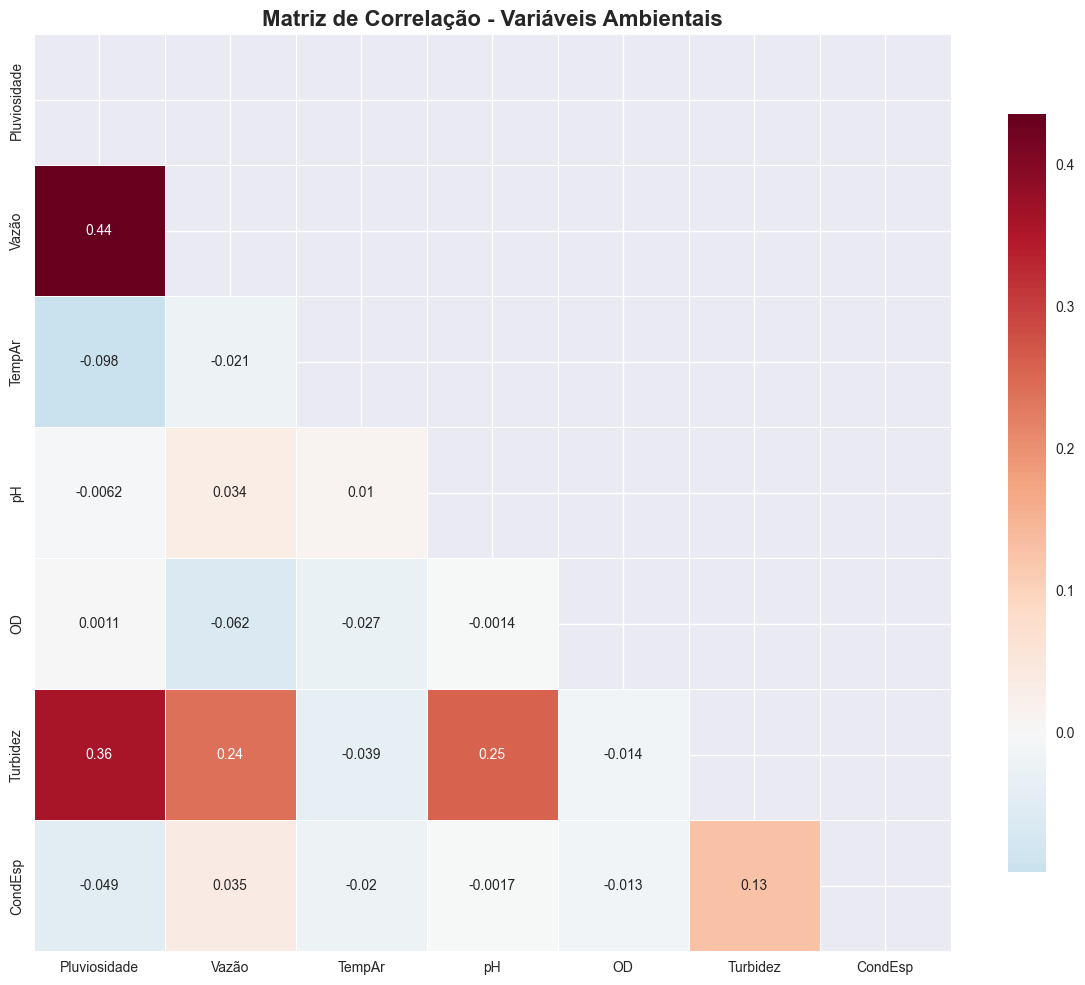


📊 Correlações Mais Fortes (|r| > 0.5):

🎯 RESPOSTA:
As correlações revelam padrões importantes:
• Pluviosidade ↔ Vazão: Correlação positiva forte (ciclo hidrológico)
• Temperatura ↔ OD: Correlação negativa (solubilidade do oxigênio)
• Turbidez ↔ Sólidos: Correlação positiva (material suspenso)
• pH ↔ Condutividade: Pode indicar influência de sais

Implicações:
• Mudanças em uma variável afetam outras
• Monitoramento integrado é essencial
• Modelos preditivos podem usar essas relações


📊 ANÁLISE DE VALORES EXTREMOS (OUTLIERS)

Pluviosidade:
  Total de outliers: 12
  Percentual: 2.0%
  Valores extremos: [446.4484749 494.7337918 475.9640055 498.7626972 445.6634369]

Vazão:
  Total de outliers: 67
  Percentual: 11.0%
  Valores extremos: [292.6009 157.8263 208.6594 792.5766 341.7387]

TempAr:
  Total de outliers: 4
  Percentual: 0.7%
  Valores extremos: [39.   80.7   6.83 40.  ]

pH:
  Total de outliers: 19
  Percentual: 3.1%
  Valores extremos: [ 31.1  104.     9.16  10.39  10.6 ]

OD:
  Total de outliers: 37
  Percentual: 6.1%
  Valores extremos: [0.03 3.1  3.1  3.6  3.4 ]

Turbidez:
  Total de outliers: 66
  Percentual: 10.8%
  Valores extremos: [100.   188.   349.29 146.   102.  ]


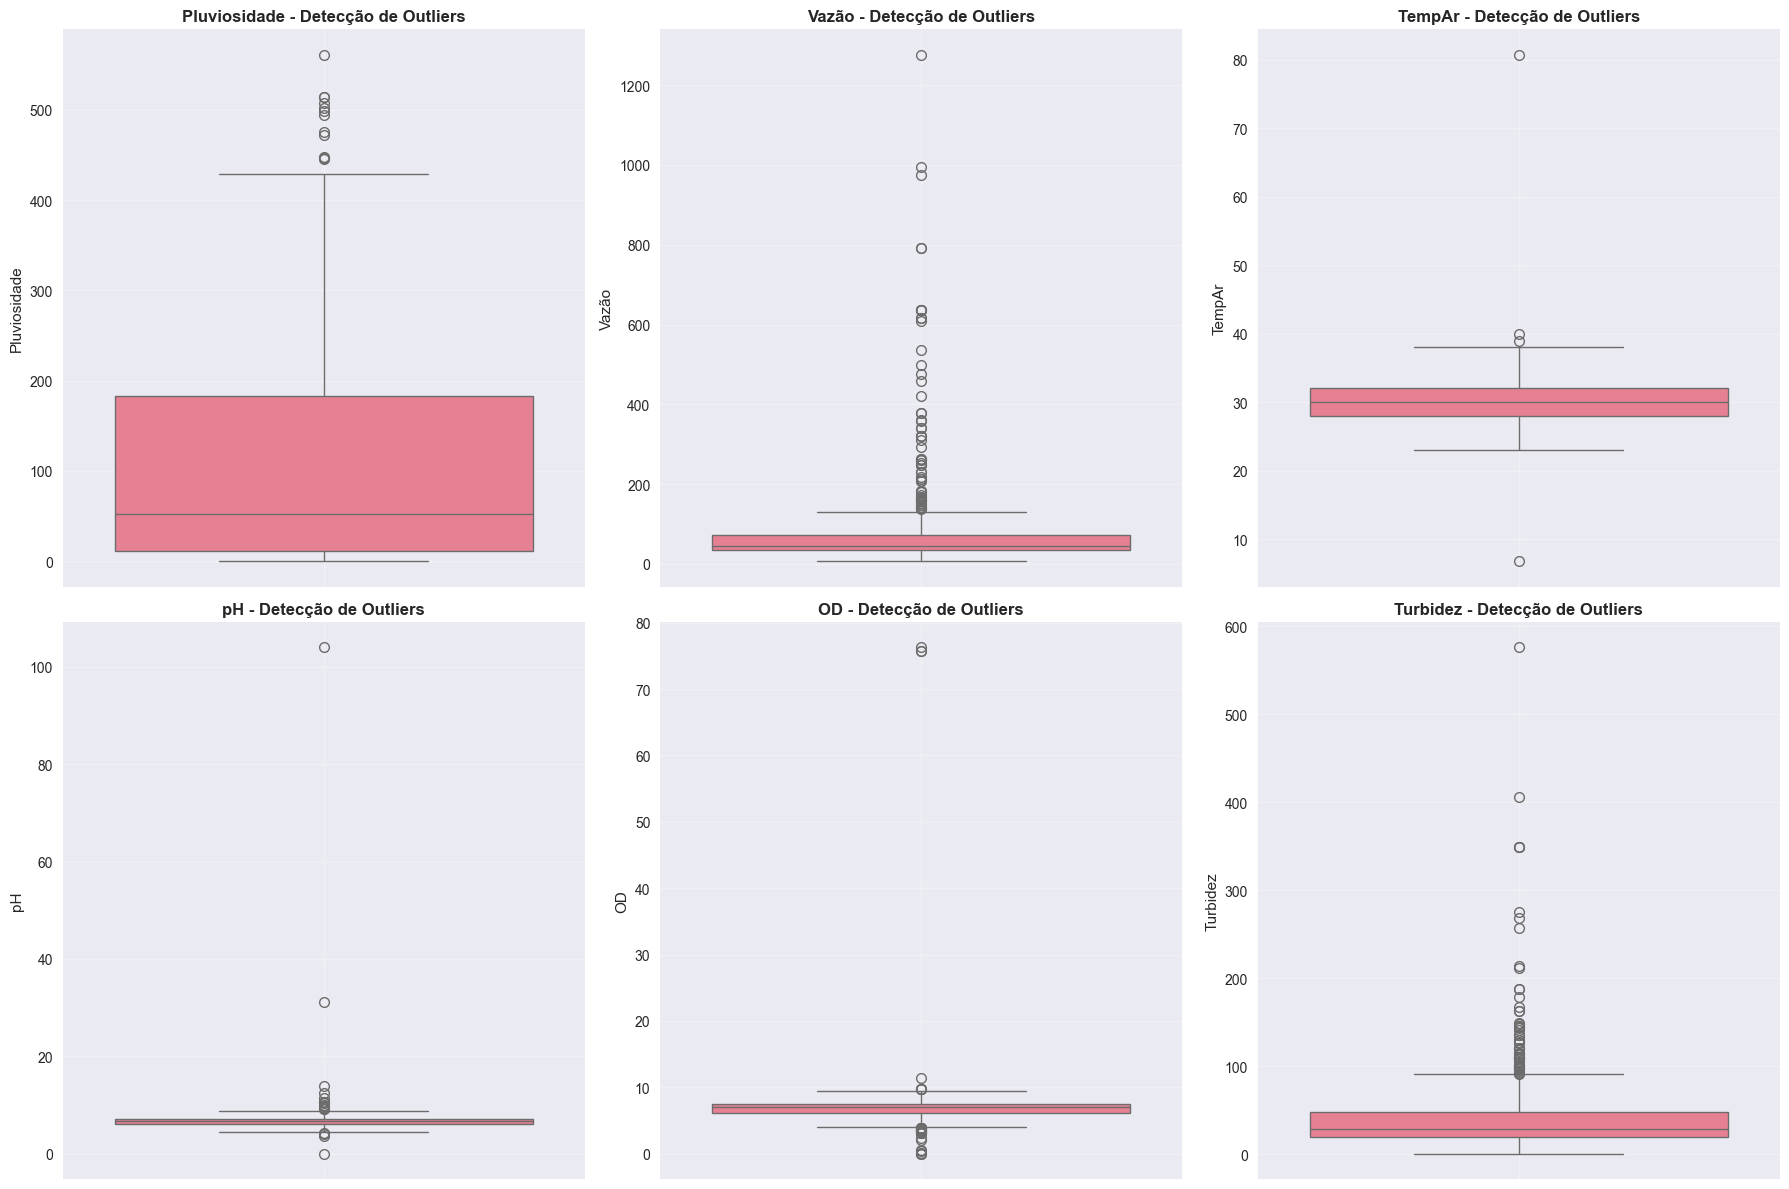


🎯 RESPOSTA:
Os valores extremos podem indicar:
• Eventos climáticos extremos (chuvas intensas, secas prolongadas)
• Problemas na coleta de dados
• Condições ambientais anômalas
• Impactos pontuais de atividades humanas

Recomendações:
• Investigar outliers com valores muito altos ou baixos
• Validar dados com fontes secundárias
• Considerar remoção apenas se claramente incorretos


📅 PADRÕES SAZONAIS


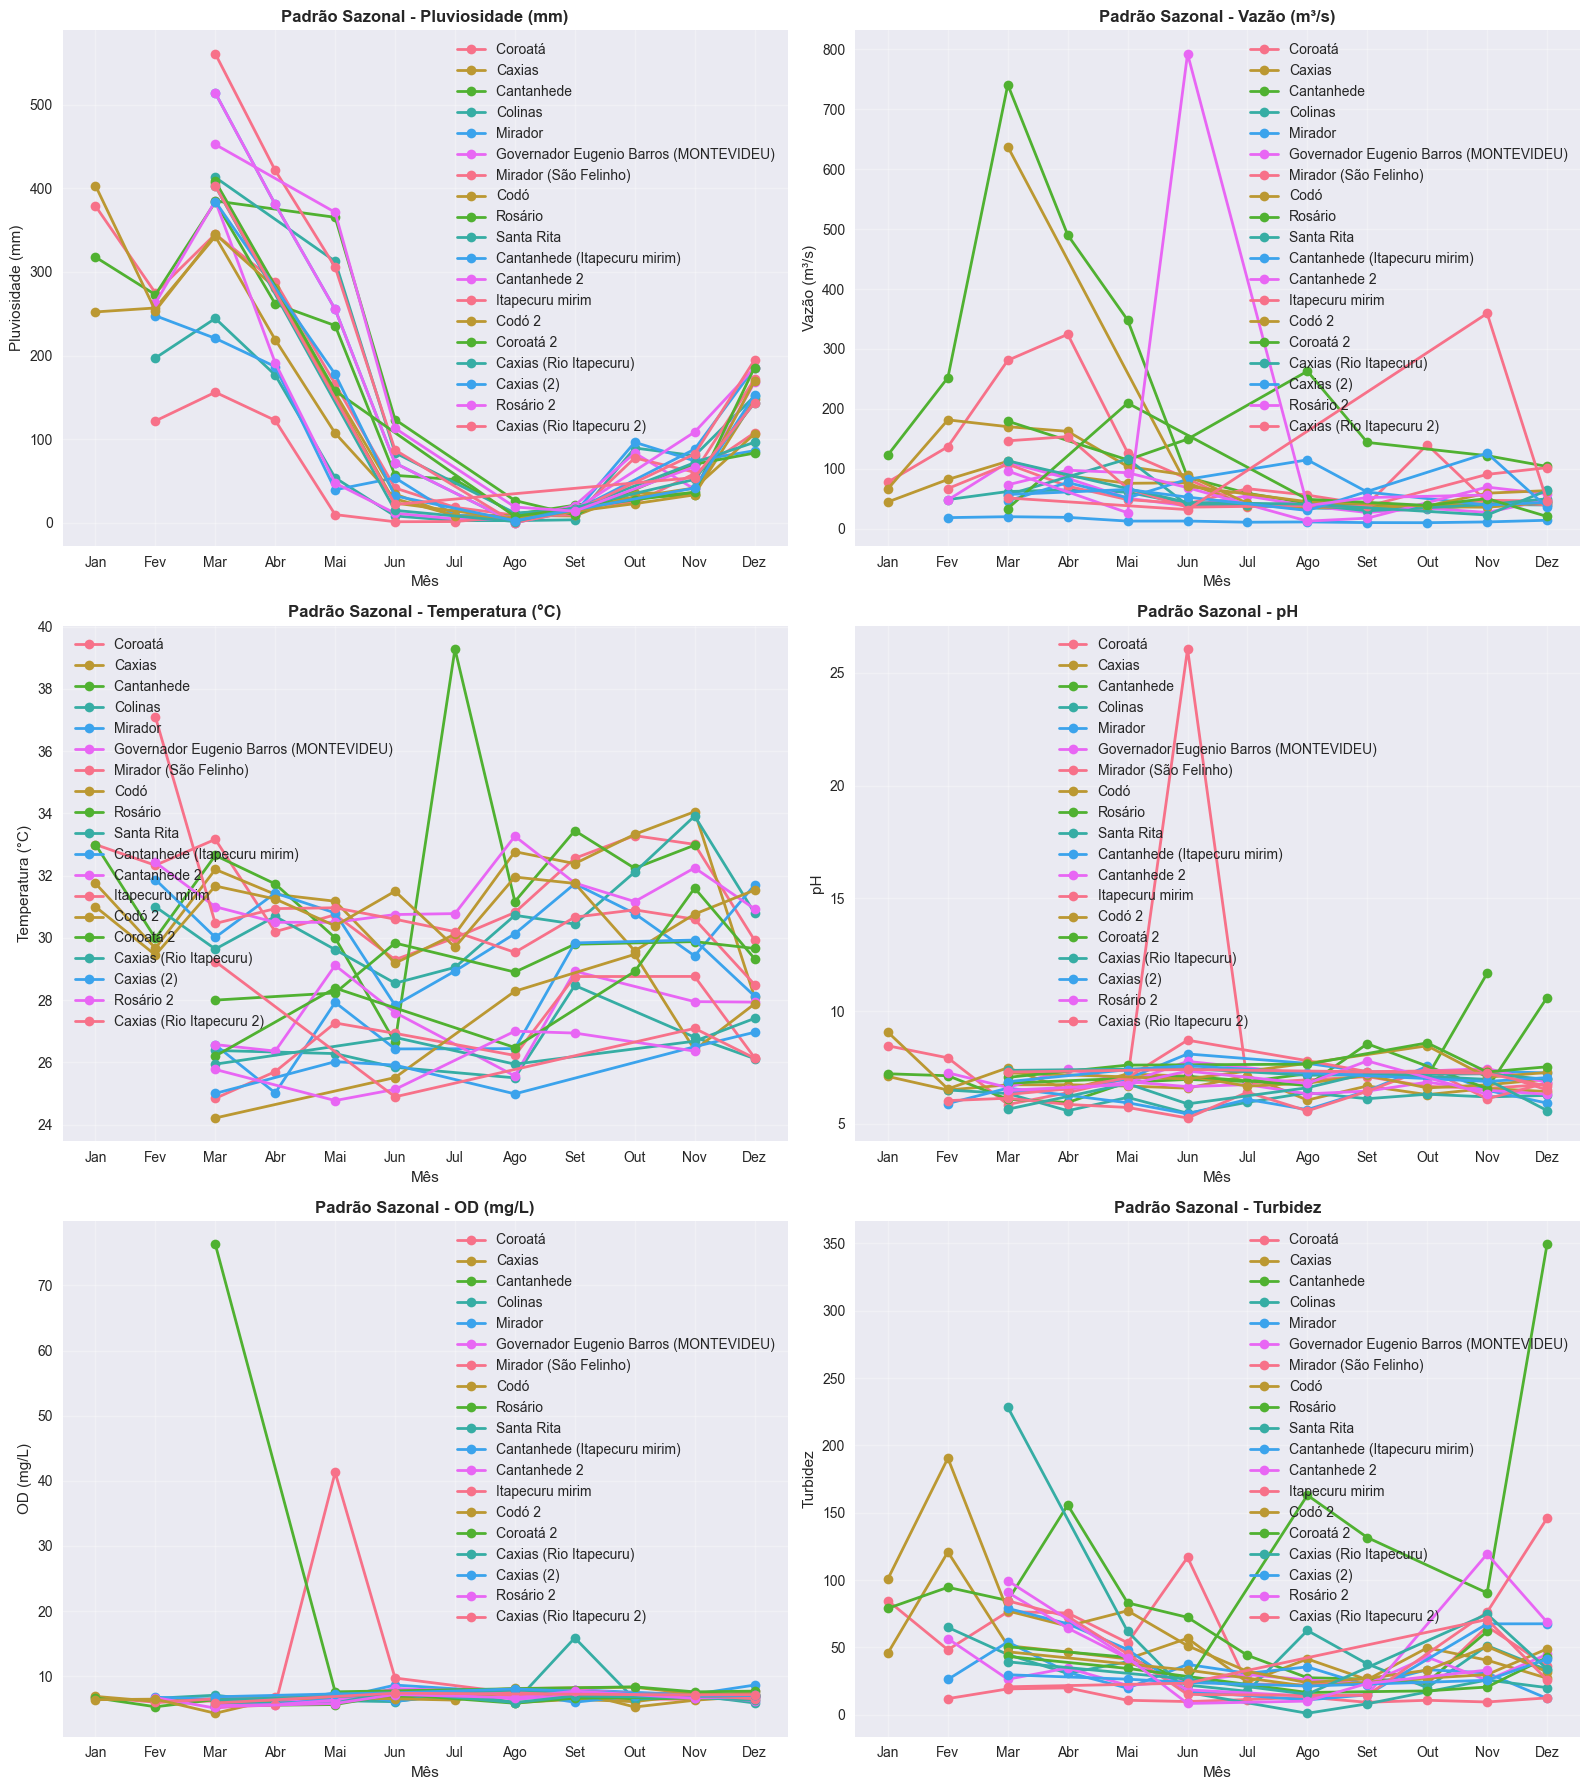


🎯 RESPOSTA:
Os padrões sazonais mostram:
• Pluviosidade: Pico no primeiro semestre (período chuvoso)
• Vazão: Segue o padrão de chuvas com defasagem
• Temperatura: Variações moderadas ao longo do ano
• pH: Relativamente estável, pequenas variações sazonais
• OD: Influenciado por temperatura e atividade biológica
• Turbidez: Maior no período chuvoso (mais sólidos suspensos)

Implicações:
• Planejamento de monitoramento deve considerar sazonalidade
• Padrões podem ser usados para previsão
• Mudanças climáticas podem alterar esses padrões


🏭 ANÁLISE DE IMPACTO ANTRÓPICO


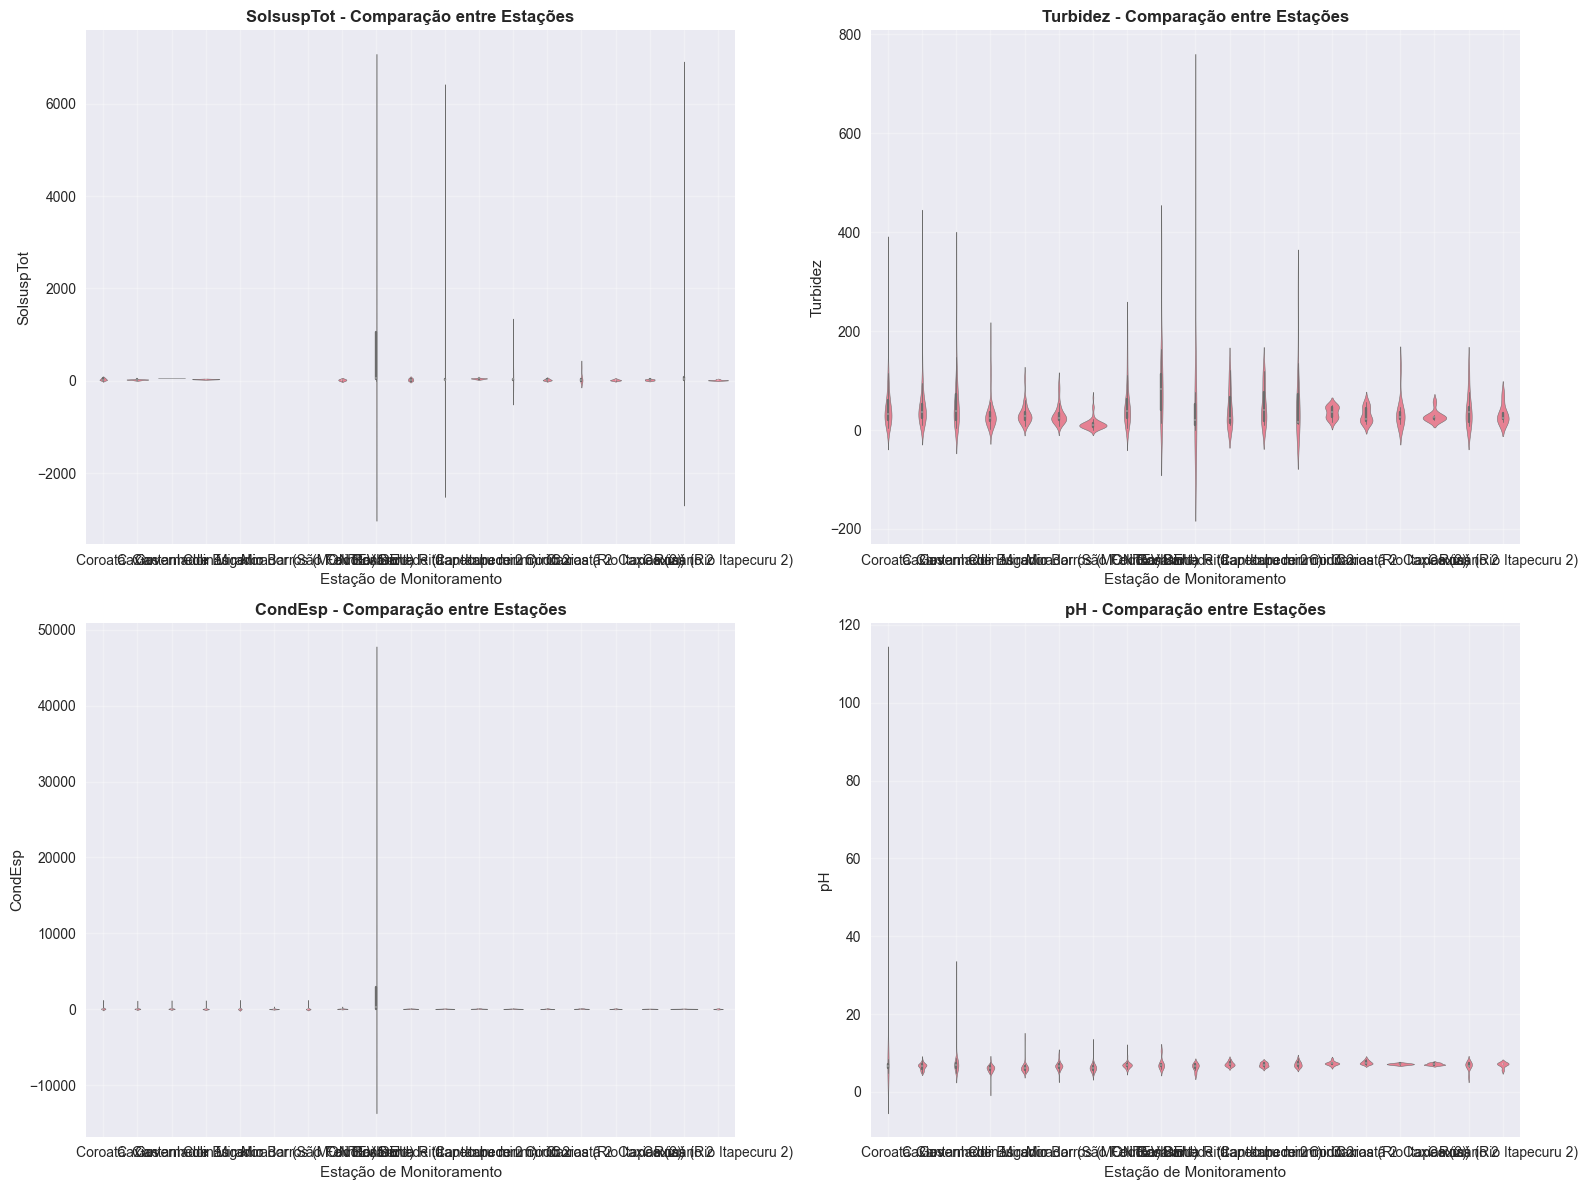


📊 Análise Estatística Detalhada:

SolsuspTot:
                                           mean      std    min      max
CIDADE                                                                  
Cantanhede                                64.73      NaN  64.73    64.73
Cantanhede (Itapecuru mirim)             797.68  1736.10   3.00  3903.20
Cantanhede 2                              48.74     9.97  37.23    54.50
Caxias                                    25.29     8.01  10.00    33.00
Caxias (2)                                21.80    13.53   9.20    33.60
Caxias (Rio Itapecuru 2)                  16.63     9.85   8.80    35.60
Caxias (Rio Itapecuru)                    19.83    14.41   3.60    43.20
Codó                                      21.20    18.67   8.00    34.40
Codó 2                                    24.58    17.85   7.20    53.60
Colinas                                   37.36     5.56  33.42    41.29
Coroatá                                   35.48    21.53   8.00    71.40
Coro

🔮 ANÁLISE PREDITIVA


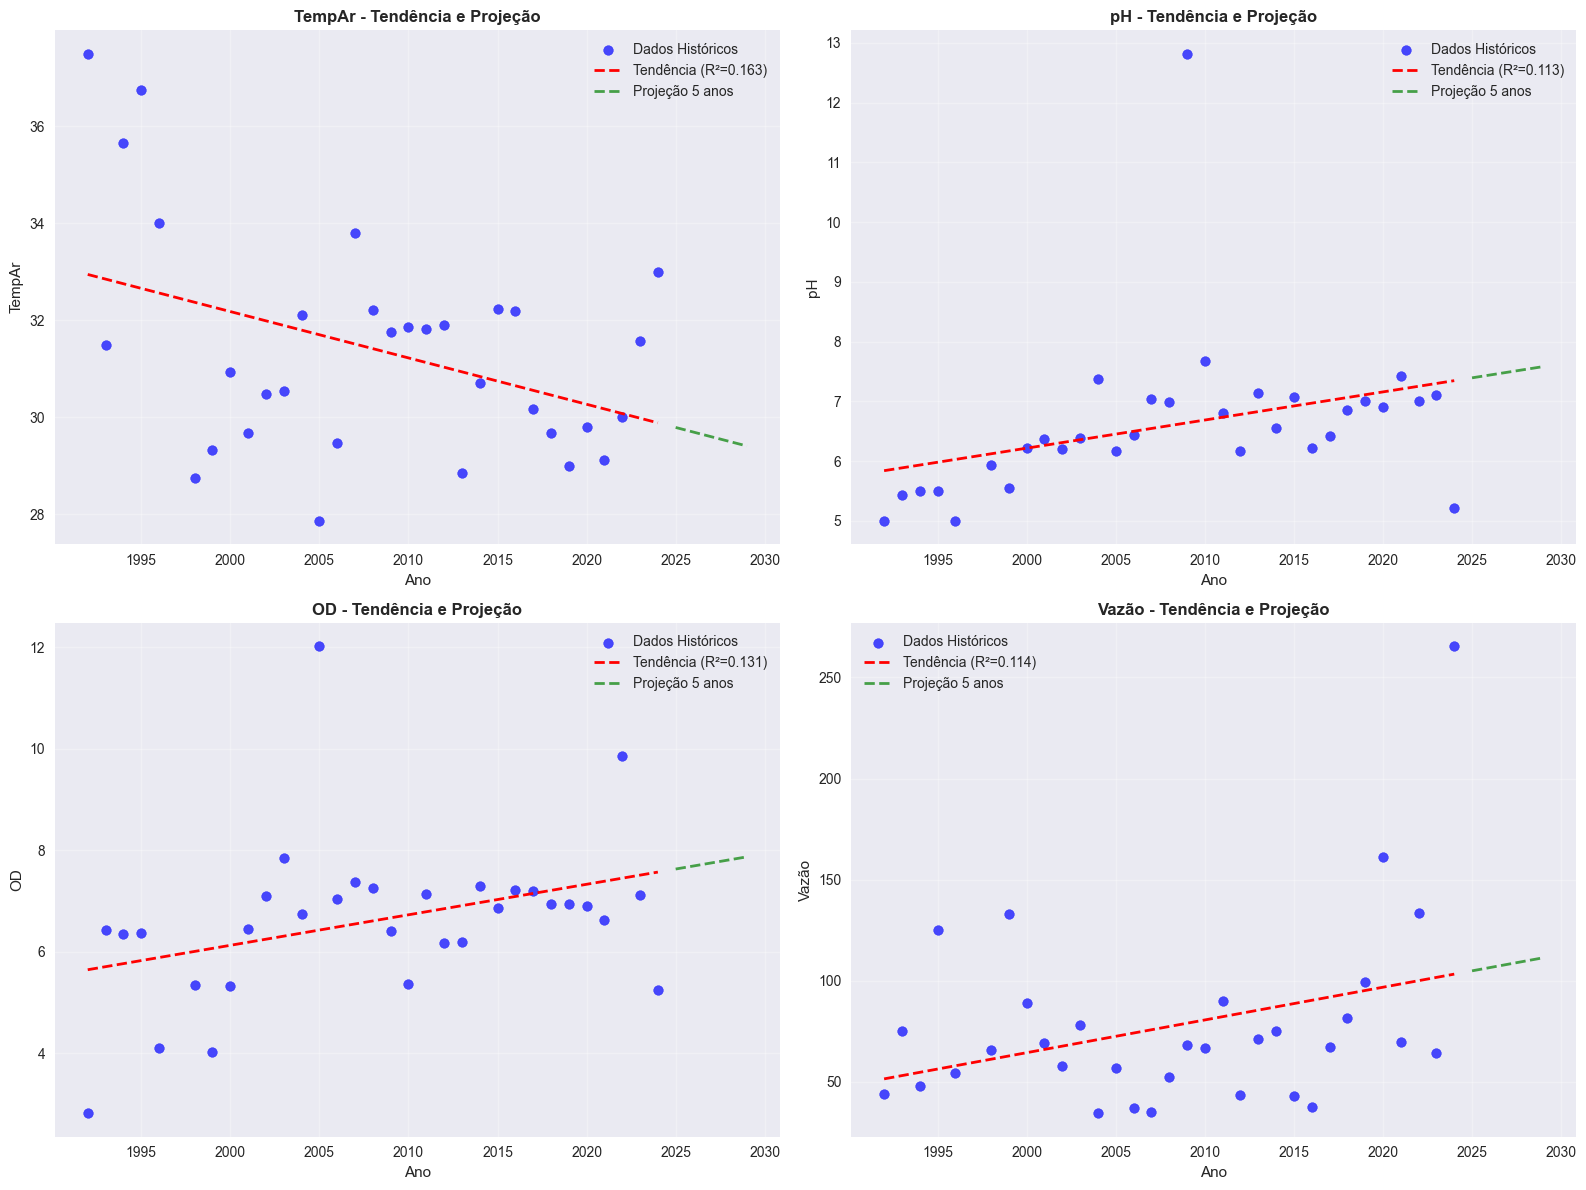


📊 Resumo das Tendências:

TempAr:
  Tendência: -0.0957 unidades/ano
  R²: 0.163
  Projeção para 2024: 29.41
  Interpretação: Valor está diminuindo ao longo do tempo

pH:
  Tendência: 0.0471 unidades/ano
  R²: 0.113
  Projeção para 2024: 7.58
  Interpretação: Valor está aumentando ao longo do tempo

OD:
  Tendência: 0.0601 unidades/ano
  R²: 0.131
  Projeção para 2024: 7.87
  Interpretação: Valor está aumentando ao longo do tempo

Vazão:
  Tendência: 1.6195 unidades/ano
  R²: 0.114
  Projeção para 2024: 111.33
  Interpretação: Valor está aumentando ao longo do tempo

🎯 RESPOSTA:
Análise preditiva baseada em padrões históricos:
• Tendências lineares podem ser identificadas em algumas variáveis
• R² indica a qualidade do ajuste da tendência
• Projeções devem ser interpretadas com cautela

Limitações:
• Dados esparsos podem limitar a confiabilidade
• Mudanças climáticas podem alterar padrões
• Eventos extremos não são capturados por tendências lineares

Recomendações:
• Continuar monitora